In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import interpolate

In [3]:

df_medida1 = pd.read_excel('Simul X Medidas\Koch_Bowtie.xlsx', 'Koch_Bowtie_1_Medida_SKY', decimal=',')
df_medida1.dtypes
df_medida1.rename(columns = {'Frequency': 'freq', ' Formatted Data':'S11_Meas1'}, inplace = True)

df_medida1['freq'] = df_medida1['freq'].astype(float)


df_medida1.dtypes

freq         float64
S11_Meas1    float64
dtype: object

In [4]:
df_medida2 = pd.read_excel('Simul X Medidas\Koch_Bowtie.xlsx', 'Koch_Bowtie_2_Medida_SKY', decimal=',')
df_medida2.dtypes
df_medida2.rename(columns = {'Frequency': 'freq', ' Formatted Data':'S11_Meas2'}, inplace = True)

df_medida2['freq'] = df_medida2['freq'].astype(float)


df_medida2.dtypes

freq         float64
S11_Meas2    float64
dtype: object

In [5]:
df_ads = pd.read_excel('Simul X Medidas\Koch_Bowtie.xlsx', 'Koch_Bowtie_ADS', decimal=',')
df_ads.dtypes
df_ads.rename(columns = {'Frequency / GHz':'freq', 'dB(S11_fitted)':'S11_ADS'}, inplace = True)

# df_ads['freq'] = round(df_cst['freq'],2)*10**9
df_ads.dtypes
# df_ads['S11_ADS']

freq       float64
S11_ADS    float64
dtype: object

In [6]:
df_cst = pd.read_excel('Simul X Medidas\Koch_Bowtie.xlsx', 'S11 - Koch_simetric_CST', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency / GHz':'freq', 'S1,1/abs,dB':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst['freq']

0       1.000000e+08
1       1.100000e+08
2       1.300000e+08
3       1.400000e+08
4       1.600000e+08
            ...     
996     1.494000e+10
997     1.496000e+10
998     1.497000e+10
999     1.499000e+10
1000    1.500000e+10
Name: freq, Length: 1001, dtype: float64

In [10]:
# df = pd.merge_ordered(df_cst, df_ads, on='freq')

df1 = df_ads.merge(df_cst, how= 'outer', on='freq')
df2 = df_medida2.merge(df_medida1, how= 'outer', on='freq')
df = df1.merge(df2, how= 'outer', on='freq')
df.sort_values(by='freq', inplace=True)

df= df.loc[df['freq']<=15e9]

df

,freq,S11_ADS,S11_CST,S11_Meas2,S11_Meas1
0,0.000000e+00,-4.532339e-14,NaN,NaN,NaN
1,9.286484e+00,-4.339474e-14,NaN,NaN,NaN
2,9.286484e+01,-6.075263e-14,NaN,NaN,NaN
3,9.286484e+02,-5.371304e-13,NaN,NaN,NaN
4,9.286484e+03,-4.878533e-11,NaN,NaN,NaN
...,...,...,...,...,...
1519,1.496000e+10,NaN,-6.898647,NaN,NaN
525,1.496142e+10,-5.160090e+00,NaN,NaN,NaN
1520,1.497000e+10,NaN,-6.922719,NaN,NaN
1521,1.499000e+10,NaN,-6.950142,NaN,NaN


In [62]:
nfreq = np.arange(100E6, 15E9, 10E6) # % desejada

f= interpolate.interp1d(df_ads['freq'], df_ads['S11_ADS'])

y_ads = f(nfreq)

y_ads

array([-4.72929797e-03, -5.52937896e-03, -6.33872789e-03, ...,
       -5.16004606e+00, -5.15999494e+00, -5.15994382e+00])

In [63]:
f= interpolate.interp1d(df_cst['freq'], df_cst['S11_CST'])

y_cst = f(nfreq)

y_cst

array([-0.23582556, -0.24406439, -0.24829796, ..., -6.9227192 ,
       -6.93643075, -6.9501423 ])

In [64]:
f= interpolate.interp1d(df_medida1['freq'], df_medida1['S11_Meas1'])

y_med1 = f(nfreq)

y_med1

array([-0.25320431, -0.26851069, -0.28381708, ..., -8.10770684,
       -8.12001756, -8.13232827])

In [65]:
f= interpolate.interp1d(df_medida2['freq'], df_medida2['S11_Meas2'])

y_med2 = f(nfreq)

y_med2

array([-0.25174396, -0.26772687, -0.28370978, ..., -8.1661981 ,
       -8.17045242, -8.17470674])

In [66]:
d= {'freq': nfreq, 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_Meas1':y_med1, 'S11_Meas2':y_med2}

df = pd.DataFrame(d)
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')
corr_spearman = df.corr(method='spearman')

corr_pearson

,freq,S11_ADS,S11_CST,S11_Meas1,S11_Meas2
freq,1.000000,0.126849,-0.094215,-0.229431,-0.240307
S11_ADS,0.126849,1.000000,0.847549,0.594295,0.596070
S11_CST,-0.094215,0.847549,1.000000,0.757115,0.762894
S11_Meas1,-0.229431,0.594295,0.757115,1.000000,0.986491
S11_Meas2,-0.240307,0.596070,0.762894,0.986491,1.000000


<Figure size 3000x2400 with 0 Axes>

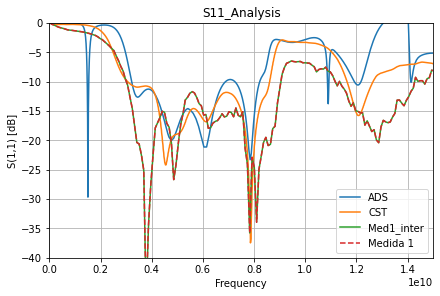

In [42]:
highest_freq = max([max(df_cst['freq']),max(df_ads['freq'])])


figure(figsize=(15, 12), dpi=200)
fig, ax = plt.subplots( layout = 'constrained')
ax.plot(df_ads['freq'], df_ads['S11_ADS'], label ='ADS')
ax.plot(df_cst['freq'], df_cst['S11_CST'], label ='CST')
ax.plot(nfreq, y, label ='Med1_inter')
ax.plot(df_medida1['freq'], df_medida1['S11_Meas1'], '--',label ='Medida 1',)
# ax.plot(df_medida2['freq'], df_medida2['S11_Meas2'], label ='Medida 2')


ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, highest_freq), ylim=(-40, 0))
ax.grid()
ax.legend()

<Figure size 3000x2400 with 0 Axes>

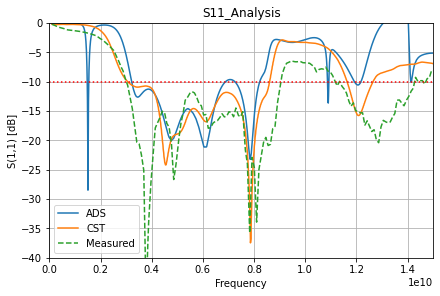

In [91]:
highest_freq = max([max(df_cst['freq']),max(df_ads['freq'])])


figure(figsize=(15, 12), dpi=200)
fig, ax = plt.subplots( layout = 'constrained')
ax.plot(df['freq'], df['S11_ADS'], label ='ADS')
ax.plot(df['freq'], df['S11_CST'], label ='CST')
ax.plot(df['freq'], df['S11_Meas1'], '--',label ='Measured',)
ax.axhline(y=-10, ls=':', color = 'r')



ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, highest_freq), ylim=(-40, 0))
ax.grid()
ax.legend()

In [ ]:
xl = pd.ExcelFile('S11_ADS.xlsx')
sh_names = xl.sheet_names

for name in sh_names:
    print (name)

Sierpinski_simetric
Sierp_Patch_3rd
Sierp_Patch_2rd
MLIN_Slot_Circular_MoM
MLIN_Disc_Monopole_MoM
MLIN_Disc_Monopole_FEM
MLIN_Cardioid_Monopole_MoM
Log_P_Koch_Param_1
Koch_simetric
fit_67
CPW_Disc_Monopole_MoM
CPW_Disc_Monopole_FEM
CPW_Cardioid_Monopole_MoM
Bowtie_import
Planilha1
